**Seaborn**

Seaborn is a statistical plotting library.

It is designed to work very well with pandas dataframe objects.

Official website : https://seaborn.pydata.org/

In [1]:
import seaborn as sns
%matplotlib inline

***DISTRIBUTION PLOTS***

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


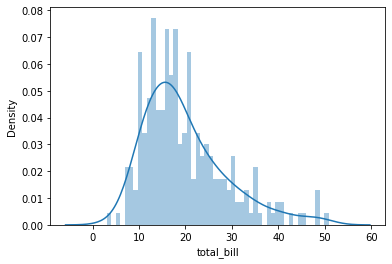

In [4]:
sns.distplot(tips['total_bill'], bins=50)
# sns.distplot(tips['total_bill'], kde=False)

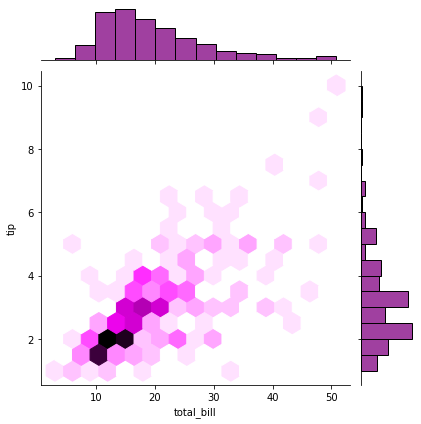

In [5]:
# kind specifies the plot inside jointplot
"""
default kind: scatter
reg
hex
kde
"""
sns.jointplot(x='total_bill', y='tip' , data=tips, kind='hex', color='purple')

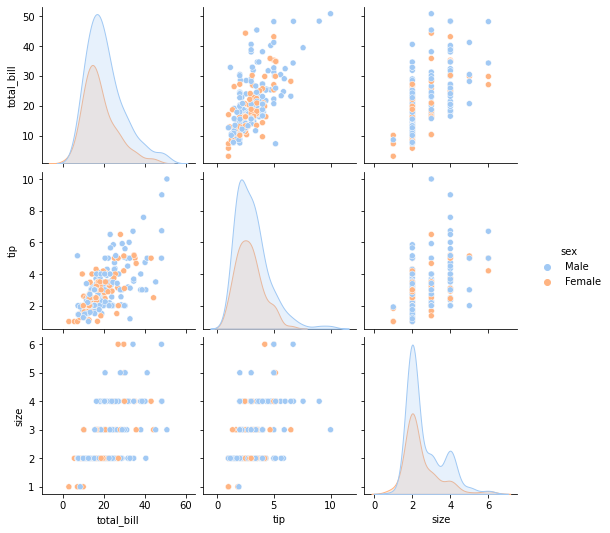

In [6]:
# hue categorize the plot based on the any categorical column
sns.pairplot(tips, hue='sex', palette='pastel')

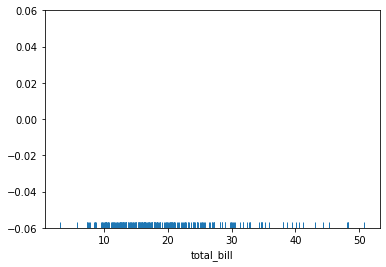

In [7]:
sns.rugplot(tips['total_bill'])

***CATEGORICAL PLOTS***

In [8]:
import numpy as np

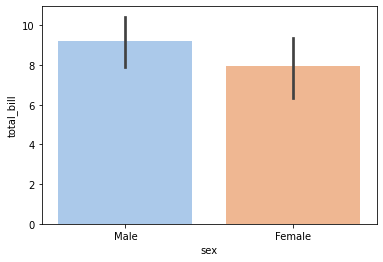

In [9]:
# x should be categorical and y could be numeric
# estimator: statistical function to estimate within each categorical bin - default avg  or mean
sns.barplot(x='sex', y='total_bill', data=tips, palette='pastel', estimator=np.std)

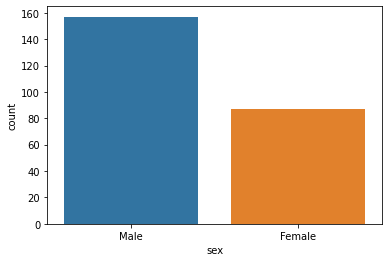

In [10]:
sns.countplot(x='sex', data=tips)

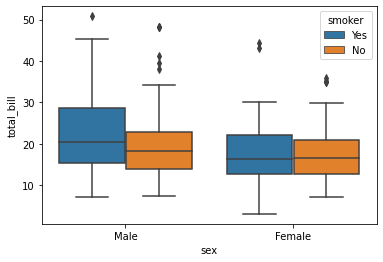

In [11]:
sns.boxplot(x='sex', y='total_bill', data=tips, hue='smoker')

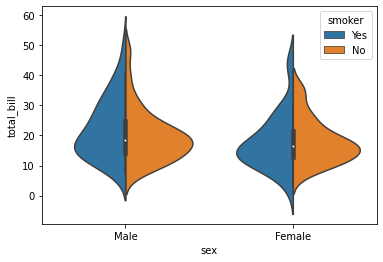

In [12]:
sns.violinplot(x='sex', y='total_bill', data=tips, hue='smoker', split=True)

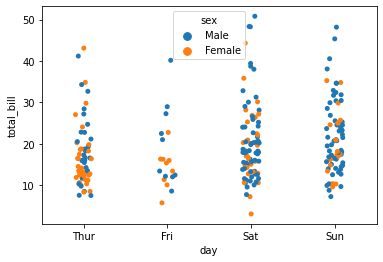

In [13]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex')

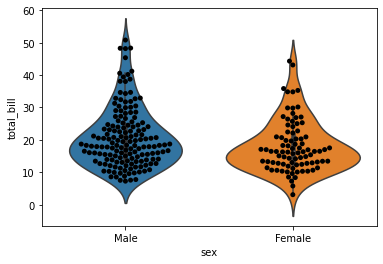

In [14]:
# recommendation: don't use swarmplot for the very large datasets
sns.violinplot(x='sex', y='total_bill', data=tips)
sns.swarmplot(x='sex', y='total_bill', data=tips, color='black')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


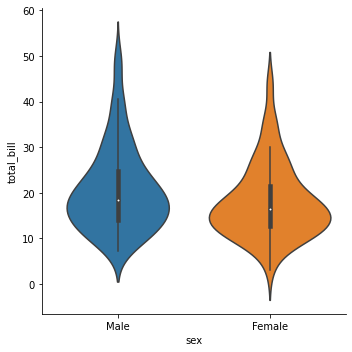

In [15]:
sns.factorplot(x='sex', y='total_bill', data=tips, kind='violin')

***MATRIX PLOTS***

In [16]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [17]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [18]:
fl = flights.corr()

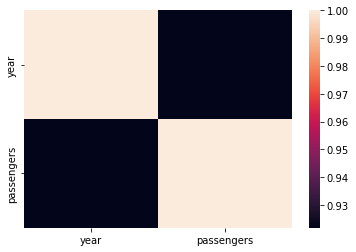

In [19]:
sns.heatmap(fl)

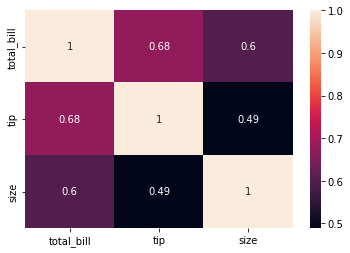

In [20]:
sns.heatmap(tips.corr(), annot=True)

In [21]:
fc = flights.pivot_table(index='month', columns='year', values='passengers')

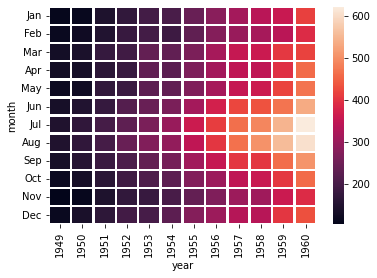

In [22]:
sns.heatmap(fc, linecolor='white', linewidth=1.5)

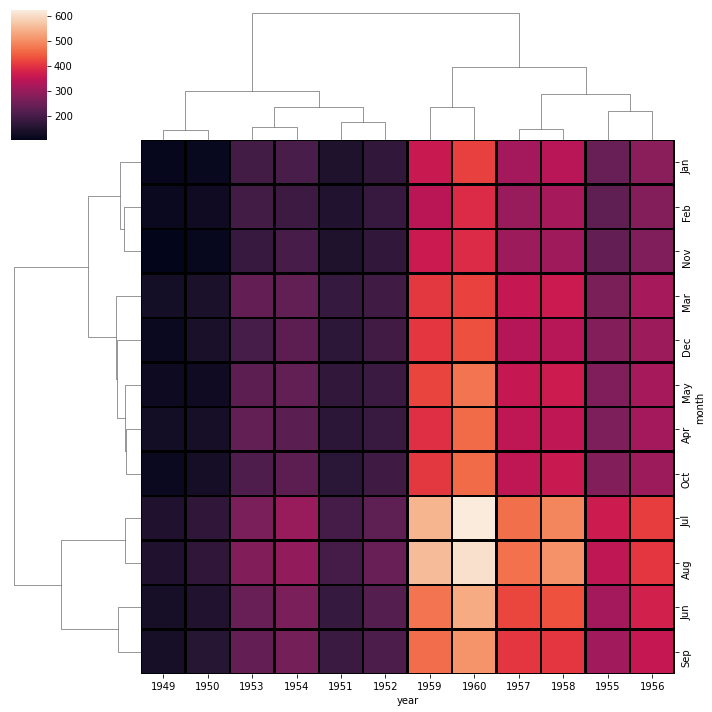

In [23]:
sns.clustermap(fc, linecolor='black', linewidth=1.5)

***GRIDS***

In [24]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


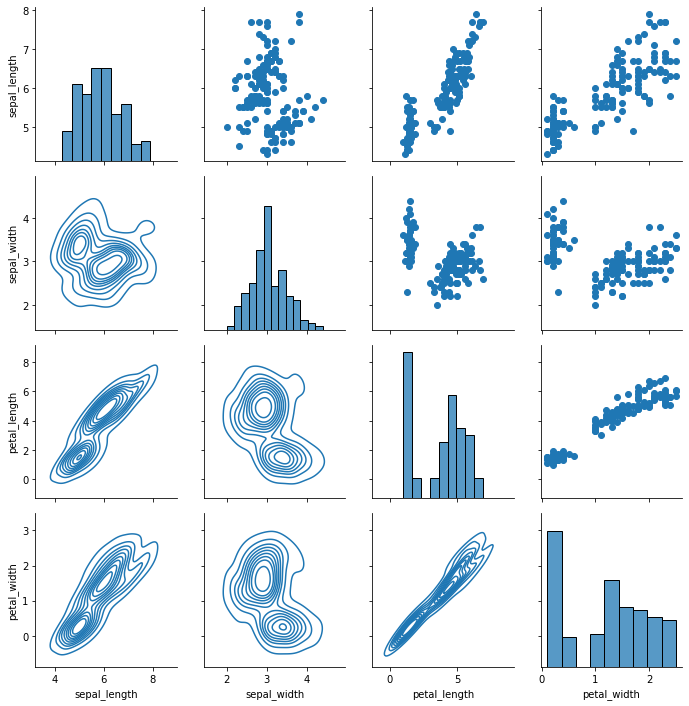

In [25]:
import matplotlib.pyplot as plt
g = sns.PairGrid(iris)
# g.map(plt.scatter)
g.map_diag(sns.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [26]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


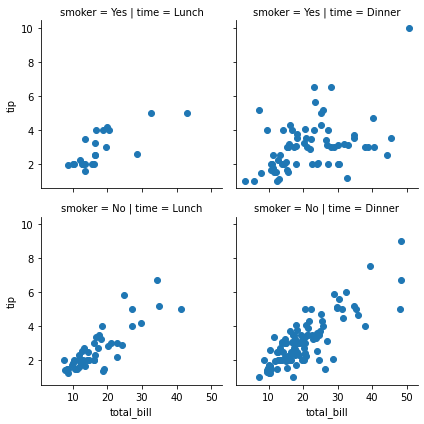

In [27]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(plt.scatter, 'total_bill', 'tip')

***REGRESSION PLOTS***

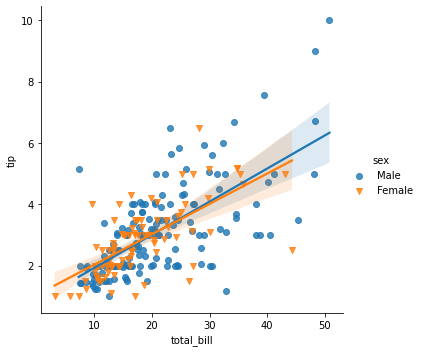

In [28]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'])

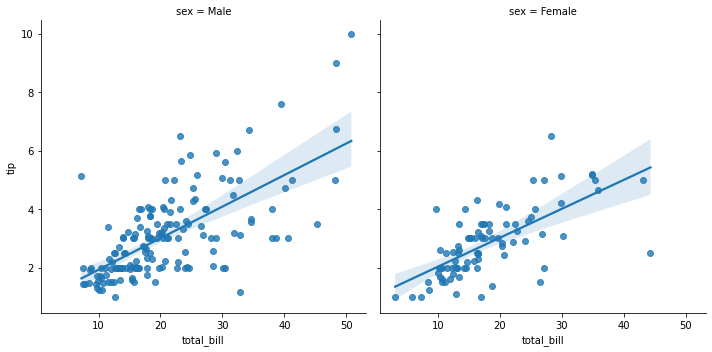

In [29]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex')

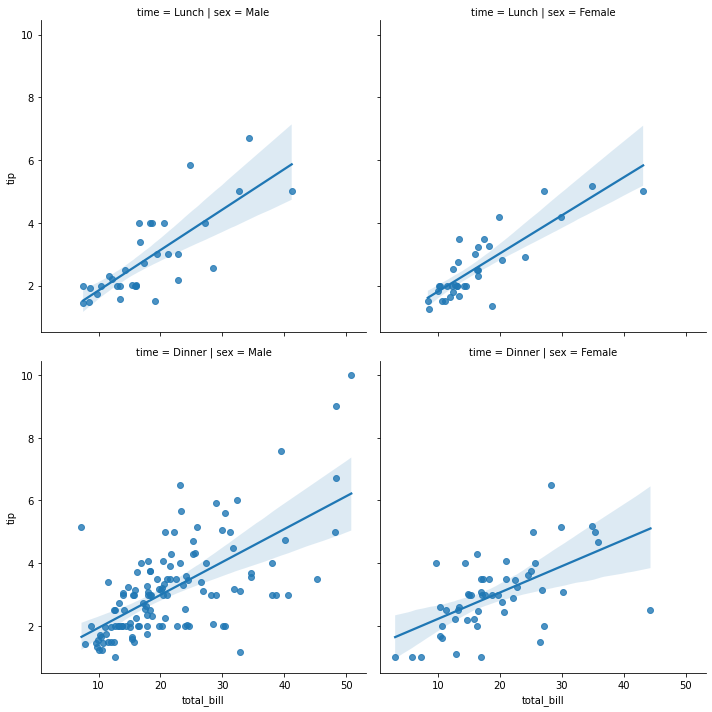

In [30]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex', row='time')

***SEABORN EXERCISE***

In [31]:
# The data
sns.set_style('whitegrid')
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


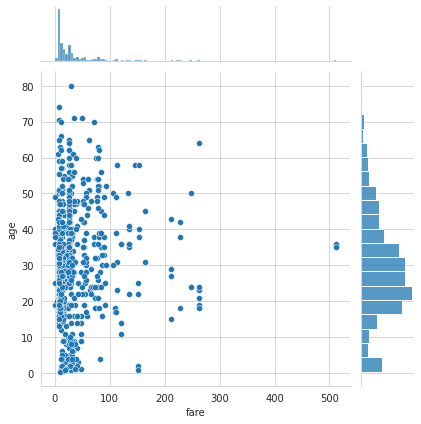

In [45]:
sns.jointplot(x='fare', y='age', data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


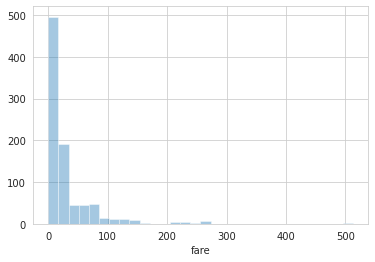

In [55]:
sns.distplot(titanic['fare'], kde=False, bins=30)

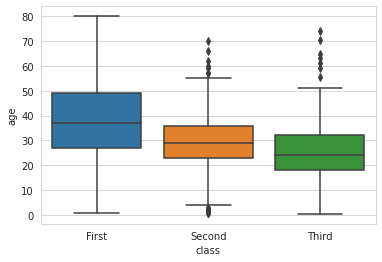

In [56]:
sns.boxplot(x='class', y='age', data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


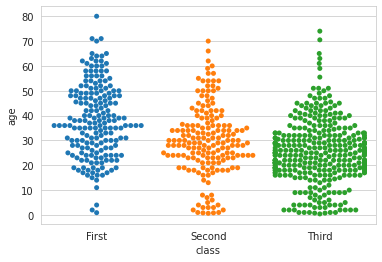

In [57]:
sns.swarmplot(x='class', y='age', data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


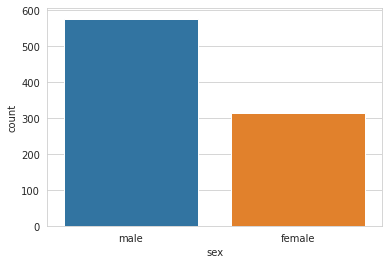

In [60]:
sns.countplot(titanic['sex'])

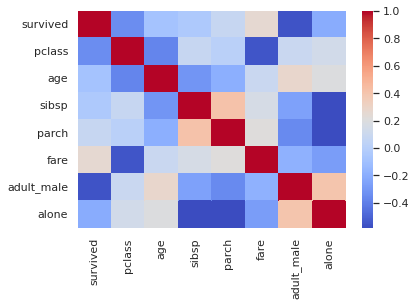

In [72]:
sns.heatmap(titanic.corr(), cmap='coolwarm')

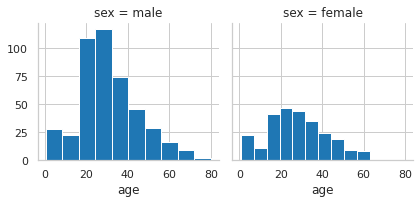

In [79]:
g = sns.FacetGrid(titanic, col='sex')
g.map(plt.hist, 'age')